In [11]:
import numpy as np
from numpy import *
import subprocess
import random
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
def writeinputf(file,dictionary):
    ''' write dictionarys parameters in file'''
    data1 = open(file,'w')
    for items in dictionary.items():
        data1.write("%s %s\n" % items)

    data1.close()

datapar = {"MHX":0.0, "MH3":0.0, "MHC":0.0, "laL":0.0, "la2":0.0, "Mh":125.0}
           
iterations = 100
data = []

for step in range(iterations):
    if (step % 10 == 0):
        print ('iterations = ', step)
        print ('length(data) = ', len(data))
    
    datapar['MHX'] = np.random.uniform(1,8) * 10
    datapar['MH3'] = datapar['MHX'] * np.random.uniform(1.1,1.2)
    datapar['MHC'] = datapar['MH3'] * np.random.uniform(1,1.1)
    datapar['laL'] = 10 ** (4 * (np.random.uniform(0,1) - 1)) * random.choice([-1,1])
    datapar['la2'] = 10 ** (4 * (np.random.uniform(0,1) - 1))
      
    writeinputf('data.dat', datapar)
      
    subprocess.getoutput("./main data.dat > output.dat")
    omega = float(subprocess.getoutput("grep Omega output.dat | awk -F'=' '{print $3}'"))
            
    if ((omega > 0.11) and (omega < 0.13)):
        
        sigma = float(subprocess.getoutput("grep ' proton' output.dat | awk -F' ' '{print $3}'"))
        
        data.append([float(datapar['MHX']), float(datapar['MH3']), float(datapar['MHC']), 
                         float(datapar['laL']), float(datapar['la2']), omega, sigma])
        
np.savetxt('data-IDM.dat', data)

iterations =  0
length(data) =  0


ValueError: could not convert string to float: ''

In [12]:
datosscan=np.loadtxt('data/data-IDM-Dark-Matter.dat')
names=['MHX','MH3','MHC','laL','la2','omega','sigma']
xdata1=pd.DataFrame(datosscan,columns=names)

In [13]:
xenon1t=np.loadtxt('data/Xenon1T-2018-20TeV.txt') 
LZ=np.loadtxt('data/LZD.png.txt') 
darwin=np.loadtxt('data/Darwin.png.txt') 

fXenon1T = interp1d(xenon1t[:,0],xenon1t[:,1]*1e36)
qdata1=xdata1[xdata1["sigma"]<fXenon1T(xdata1["MHX"])]
qdata2=qdata1[qdata1["sigma"]<fXenon1T(qdata1["MHX"])]

fdarwin  = interp1d(darwin[:,0],darwin[:,1]*1e-14)
qdata3=qdata2[qdata2["sigma"]>fdarwin(qdata2["MHX"])]
qdata4=qdata3[qdata3["sigma"]>fdarwin(qdata3["MHX"])]

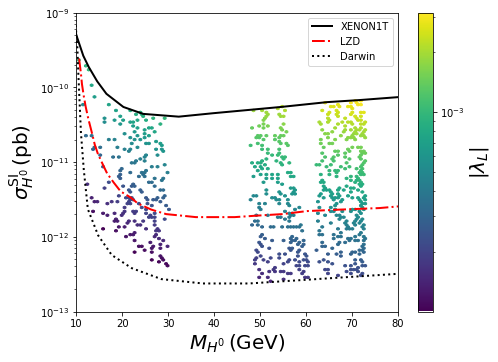

In [14]:
plt.figure(figsize=(7.2,5.5))
plt.hexbin(qdata4["MHX"], qdata4["sigma"], np.abs(qdata4["laL"]), 
           gridsize=100, yscale='log', norm=LogNorm())
c=plt.colorbar()
c.set_label(r'$|\lambda_L|$',size=20)


xenon1t = np.loadtxt('data/Xenon1T-2018-20TeV.txt') 
LZ = np.loadtxt('data/LZD.png.txt') 
darwin = np.loadtxt('data/Darwin.png.txt') 

plt.plot(xenon1t[:,0],xenon1t[:,1]*1e36,'k-',linewidth=2.0, label = 'XENON1T')
plt.plot(LZ[:,0],LZ[:,1]*1e36,'r-.',linewidth=2.0, label = 'LZD')
plt.plot(darwin[:,0],darwin[:,1]*1e-14,'k:',linewidth=2.0, label = 'Darwin')

plt.xlabel(r'$M_{H^0}\, (\rm{GeV})$',size=20)
plt.ylabel(r'$\sigma_{H^0}^{\rm{SI}}\,({\rm pb})$',size=20)
plt.xlim(10,80)
plt.ylim(1e-13,1e-9)
plt.legend(loc='upper right')
plt.savefig("plots/mass-sigma-lambdaL.pdf");

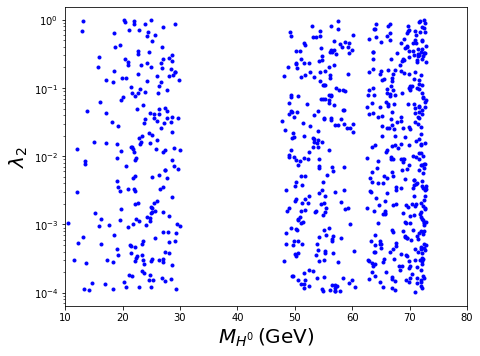

In [15]:
plt.figure(figsize=(7.2,5.5))
plt.plot(qdata4["MHX"], qdata4["la2"], 'b.')

plt.xlabel(r'$M_{H^0}\, (\rm{GeV})$',size=20)
plt.ylabel(r'$\lambda_2$',size=20)
plt.xlim(10,80)
plt.yscale('log')
plt.savefig("plots/mass-la2.pdf");

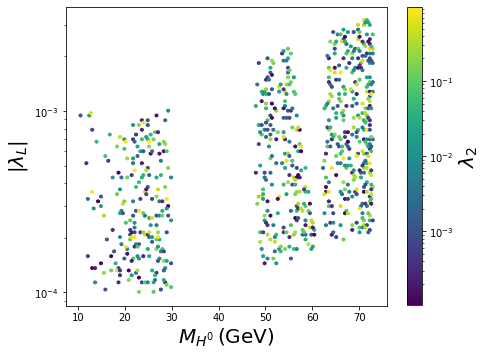

In [16]:
plt.figure(figsize=(7.2,5.5))
plt.hexbin(qdata4["MHX"], np.abs(qdata4["laL"]), qdata4["la2"], 
           gridsize=100, yscale='log', norm=LogNorm())
c=plt.colorbar()
c.set_label(r'$\lambda_2$',size=20)

plt.xlabel(r'$M_{H^0}\,(\rm{GeV})$',size=20)
plt.ylabel(r'$|\lambda_L|$',size=20)
plt.savefig("plots/mass-laL-la2.pdf");

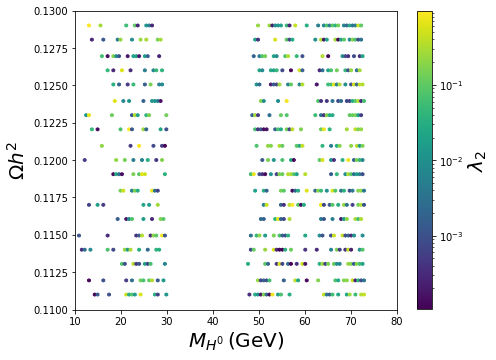

In [17]:
plt.figure(figsize=(7.2,5.5))

plt.hexbin(qdata4["MHX"], qdata4["omega"], qdata4["la2"], 
           gridsize=100, norm=LogNorm(), alpha = 1)
c=plt.colorbar()
c.set_label(r'$\lambda_2$',size=20)


plt.xlabel(r'$M_{H^0} \, (\rm{GeV})$',size=20)
plt.ylabel(r'$\Omega h^2$',size=20)
plt.xlim(10,80)
plt.ylim(0.11,0.13)
plt.savefig("plots/mass-omega-la2.pdf");

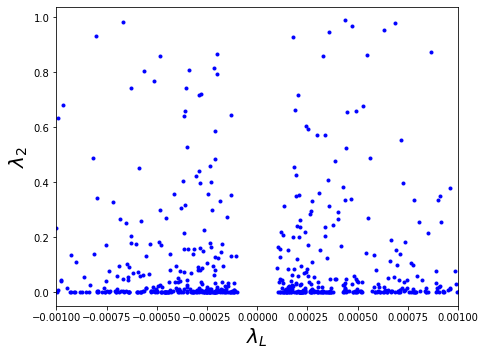

In [18]:
plt.figure(figsize=(7.2,5.5))
plt.plot(qdata4["laL"], qdata4["la2"], 'b.')

plt.xlabel(r'$\lambda_L$',size=20)
plt.ylabel(r'$\lambda_2$',size=20)
plt.xlim(-1e-3,1e-3)
plt.savefig("plots/laL-la2.pdf")

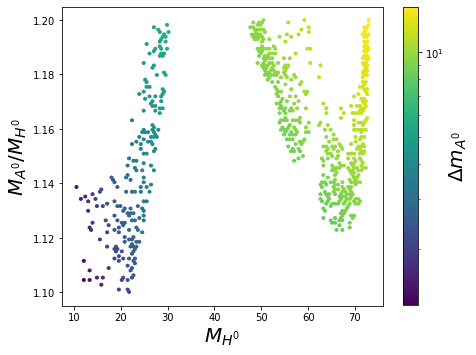

In [19]:
plt.figure(figsize=(7.2,5.5))
plt.hexbin(qdata4["MHX"], qdata4["MH3"] / qdata4["MHX"], qdata4["MH3"] - qdata4["MHX"], 
           gridsize=100, norm=LogNorm())
c=plt.colorbar()
c.set_label(r'$\Delta m_{A^0}$',size=20)
plt.xlabel(r'$M_{H^0}$',size=20)
plt.ylabel(r'$M_{A^0} / M_{H^0}$',size=20)
plt.savefig("plots/mass-mass1.pdf")

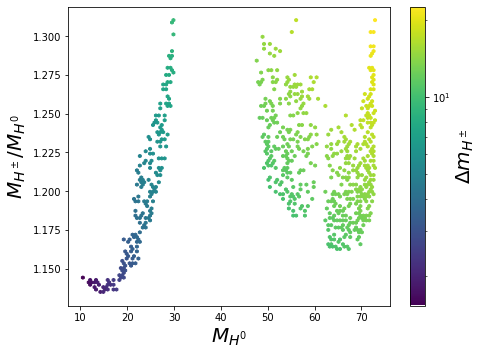

In [20]:
plt.figure(figsize=(7.2,5.5))
plt.hexbin(qdata4["MHX"], qdata4["MHC"] / qdata4["MHX"], qdata4["MHC"] - qdata4["MHX"], 
           gridsize=100, norm=LogNorm())
c=plt.colorbar()
c.set_label(r'$\Delta m_{H^\pm}$',size=20)
plt.xlabel(r'$M_{H^0}$',size=20)
plt.ylabel(r'$M_{H^\pm} / M_{H^0}$',size=20)
plt.savefig("plots/mass-mass2.pdf")